<a href="https://colab.research.google.com/github/Saadahm/Saadahm1/blob/main/Linear_Regression_Samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('005930.KS.csv')

In [31]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02
mean,37824.015296,38890.114723,36915.908222,37928.661568,34140.940932,6.744126e+07
std,15916.738290,16371.771449,15559.271241,15935.509185,16596.217493,2.931286e+07
min,13680.000000,14760.000000,13440.000000,13600.000000,11175.750000,0.000000e+00
25%,25810.000000,26520.000000,25240.000000,25770.000000,21741.436524,4.856692e+07
50%,30360.000000,31160.000000,29780.000000,30540.000000,25453.410156,6.066430e+07
75%,47500.000000,49250.000000,46490.000000,47730.000000,43727.035157,7.755890e+07
max,90000.000000,96800.000000,87800.000000,88800.000000,88407.148438,2.348832e+08


In [32]:
df['Date']=pd.to_datetime(df.Date)

In [33]:
df.shape

(523, 7)

In [34]:
df.drop('Adj Close',axis=1,inplace = True)

In [35]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2011-06-13,16880.0,17460.0,16060.0,16380.0,86986900
1,2011-06-20,16260.0,17080.0,15900.0,17040.0,96266850
2,2011-06-27,16940.0,17200.0,16420.0,17100.0,76047550
3,2011-07-04,17400.0,17980.0,17380.0,17700.0,83693400
4,2011-07-11,17600.0,17600.0,16420.0,16640.0,78787450


In [36]:
x=df[['Open','High','Low','Volume']]
y=df['Close']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [38]:
x_train.shape

(392, 4)

In [39]:
x_test.shape

(131, 4)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor=LinearRegression()

In [41]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(regressor.coef_)

[-6.04618667e-01  8.37612366e-01  7.62652431e-01 -2.56449352e-06]


In [43]:
print(regressor.intercept_)

239.2707491712572


In [44]:
predicted=regressor.predict(x_test)

In [45]:
print(x_test)

        Open     High      Low     Volume
15   15200.0  16960.0  15180.0  118318100
78   30120.0  30720.0  29380.0   85543650
137  25860.0  26080.0  25460.0   44229500
264  29280.0  29500.0  28240.0   57607850
113  24600.0  26020.0  24500.0   55491750
..       ...      ...      ...        ...
71   25540.0  26440.0  25520.0   60124150
473  54000.0  55900.0  52300.0  101050903
6    17000.0  17040.0  16520.0   59548450
8    15400.0  15780.0  13760.0  202264800
319  50700.0  51000.0  47380.0   66752950

[131 rows x 4 columns]


In [46]:
predicted.shape

(131,)

In [47]:
dframe=pd.DataFrame(y_test,predicted)


In [48]:
dfr=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predicted})

In [49]:
print(dfr)

     Actual Price  Predicted Price
15        16800.0     16528.610641
78        30300.0     29946.960671
137       25600.0     25752.467154
264       29200.0     28635.170672
113       25900.0     25703.001632
..            ...              ...
71        25740.0     26252.482999
473       52700.0     54039.971750
6         16880.0     16679.974674
8         14140.0     14121.057096
319       47760.0     48266.619676

[131 rows x 2 columns]


In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score


In [51]:
regressor.score(x_test,y_test)

0.998469500848781

In [52]:
import math

In [53]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 452.3722247970626


In [54]:
print('Mean Square Error:',metrics.mean_squared_error(y_test,predicted))

Mean Square Error: 416422.23652117926


In [55]:
print('Root Mean Absolute Error:',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))

Root Mean Absolute Error: 21.26904381482775


In [56]:
graph=dfr.head(30)

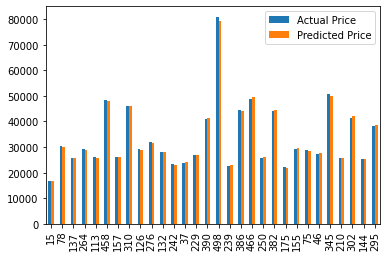

In [57]:
graph.plot(kind='bar')